[*********************100%***********************]  1 of 1 completed


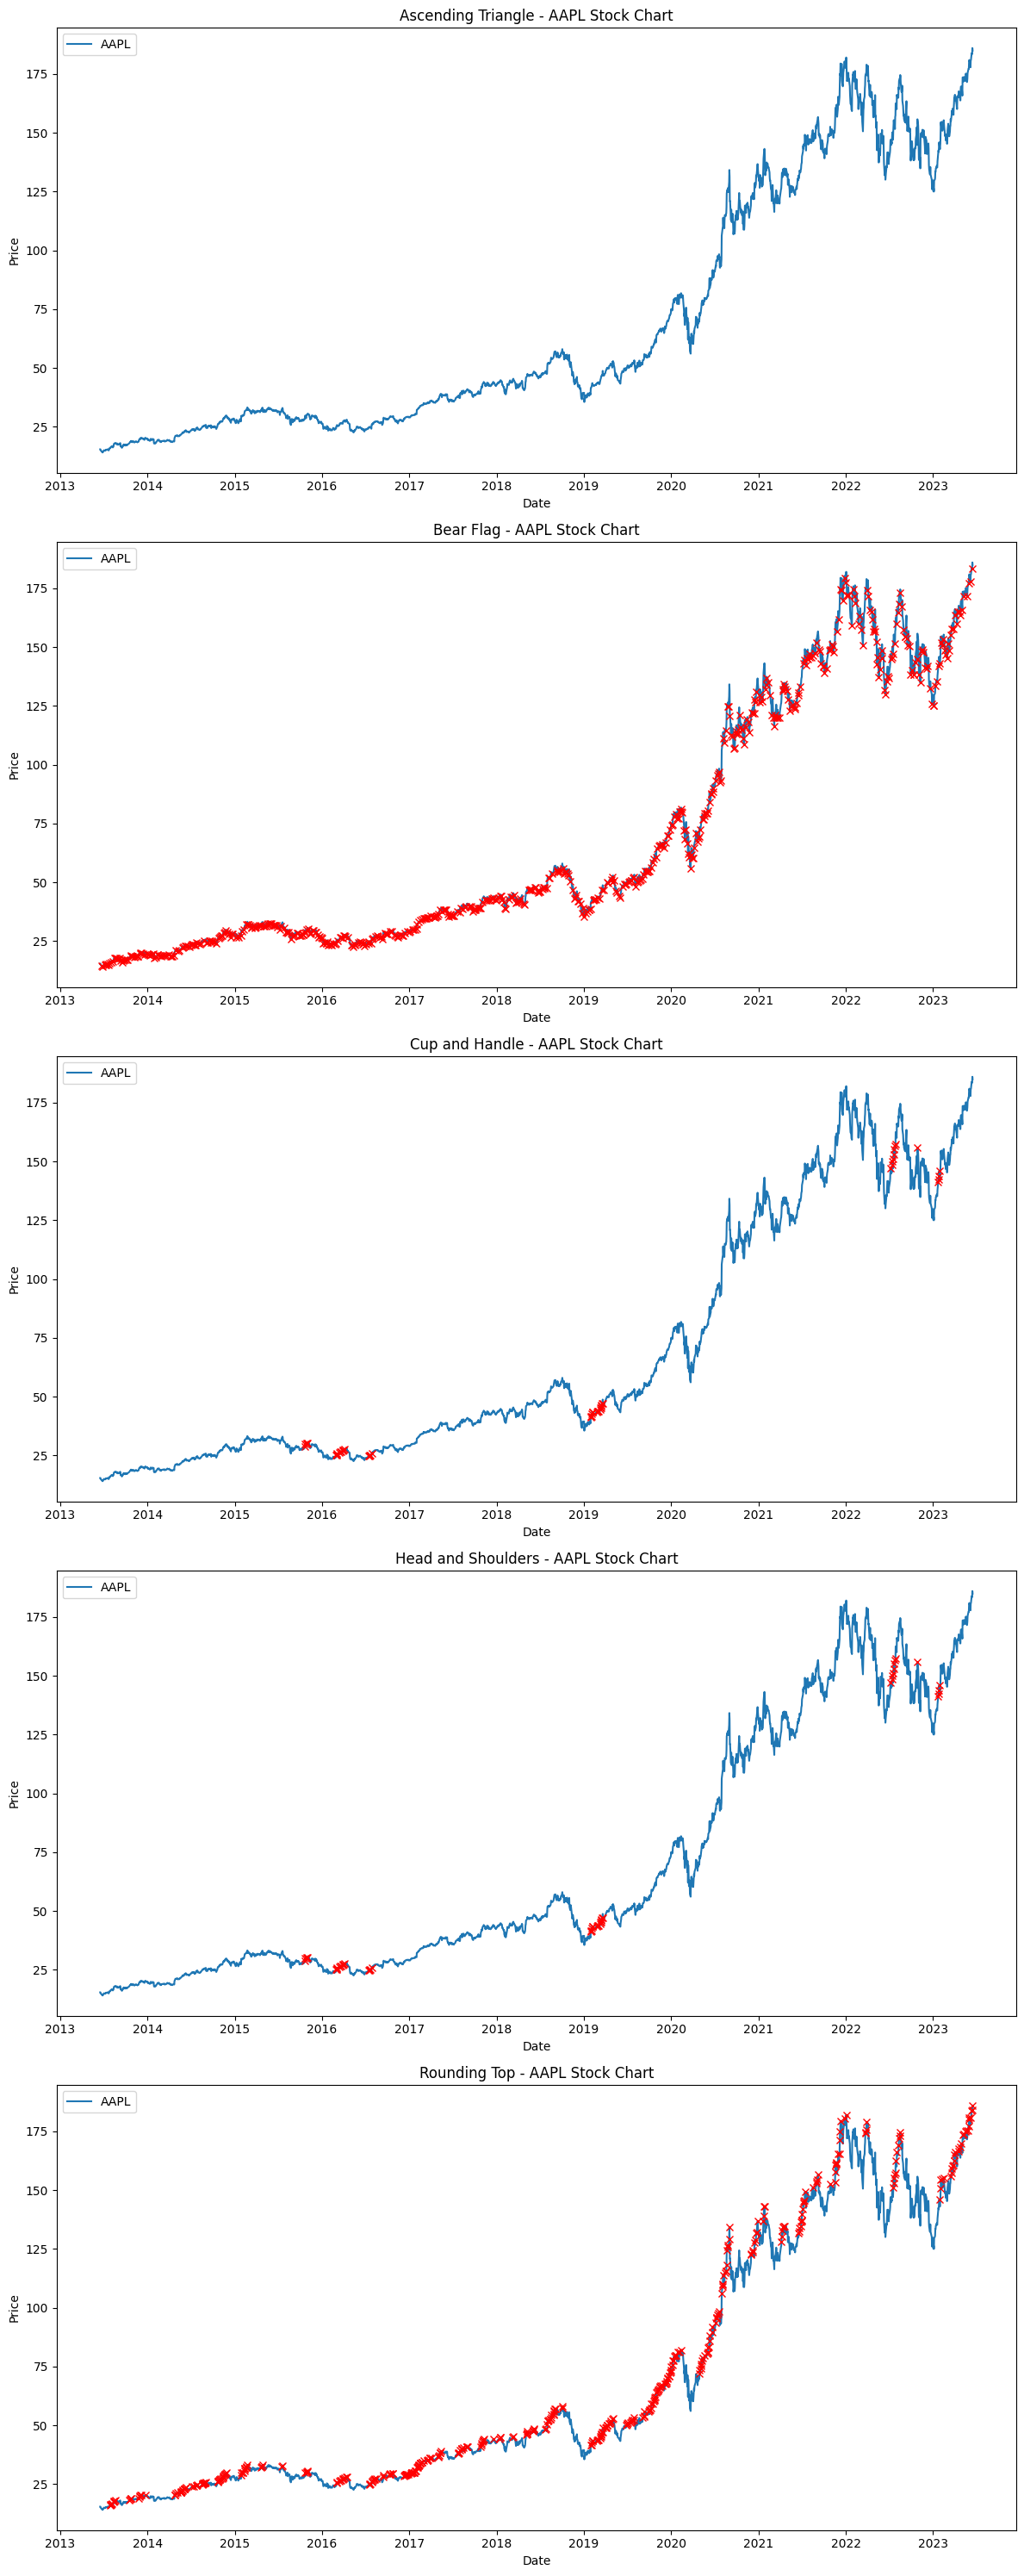

[*********************100%***********************]  1 of 1 completed


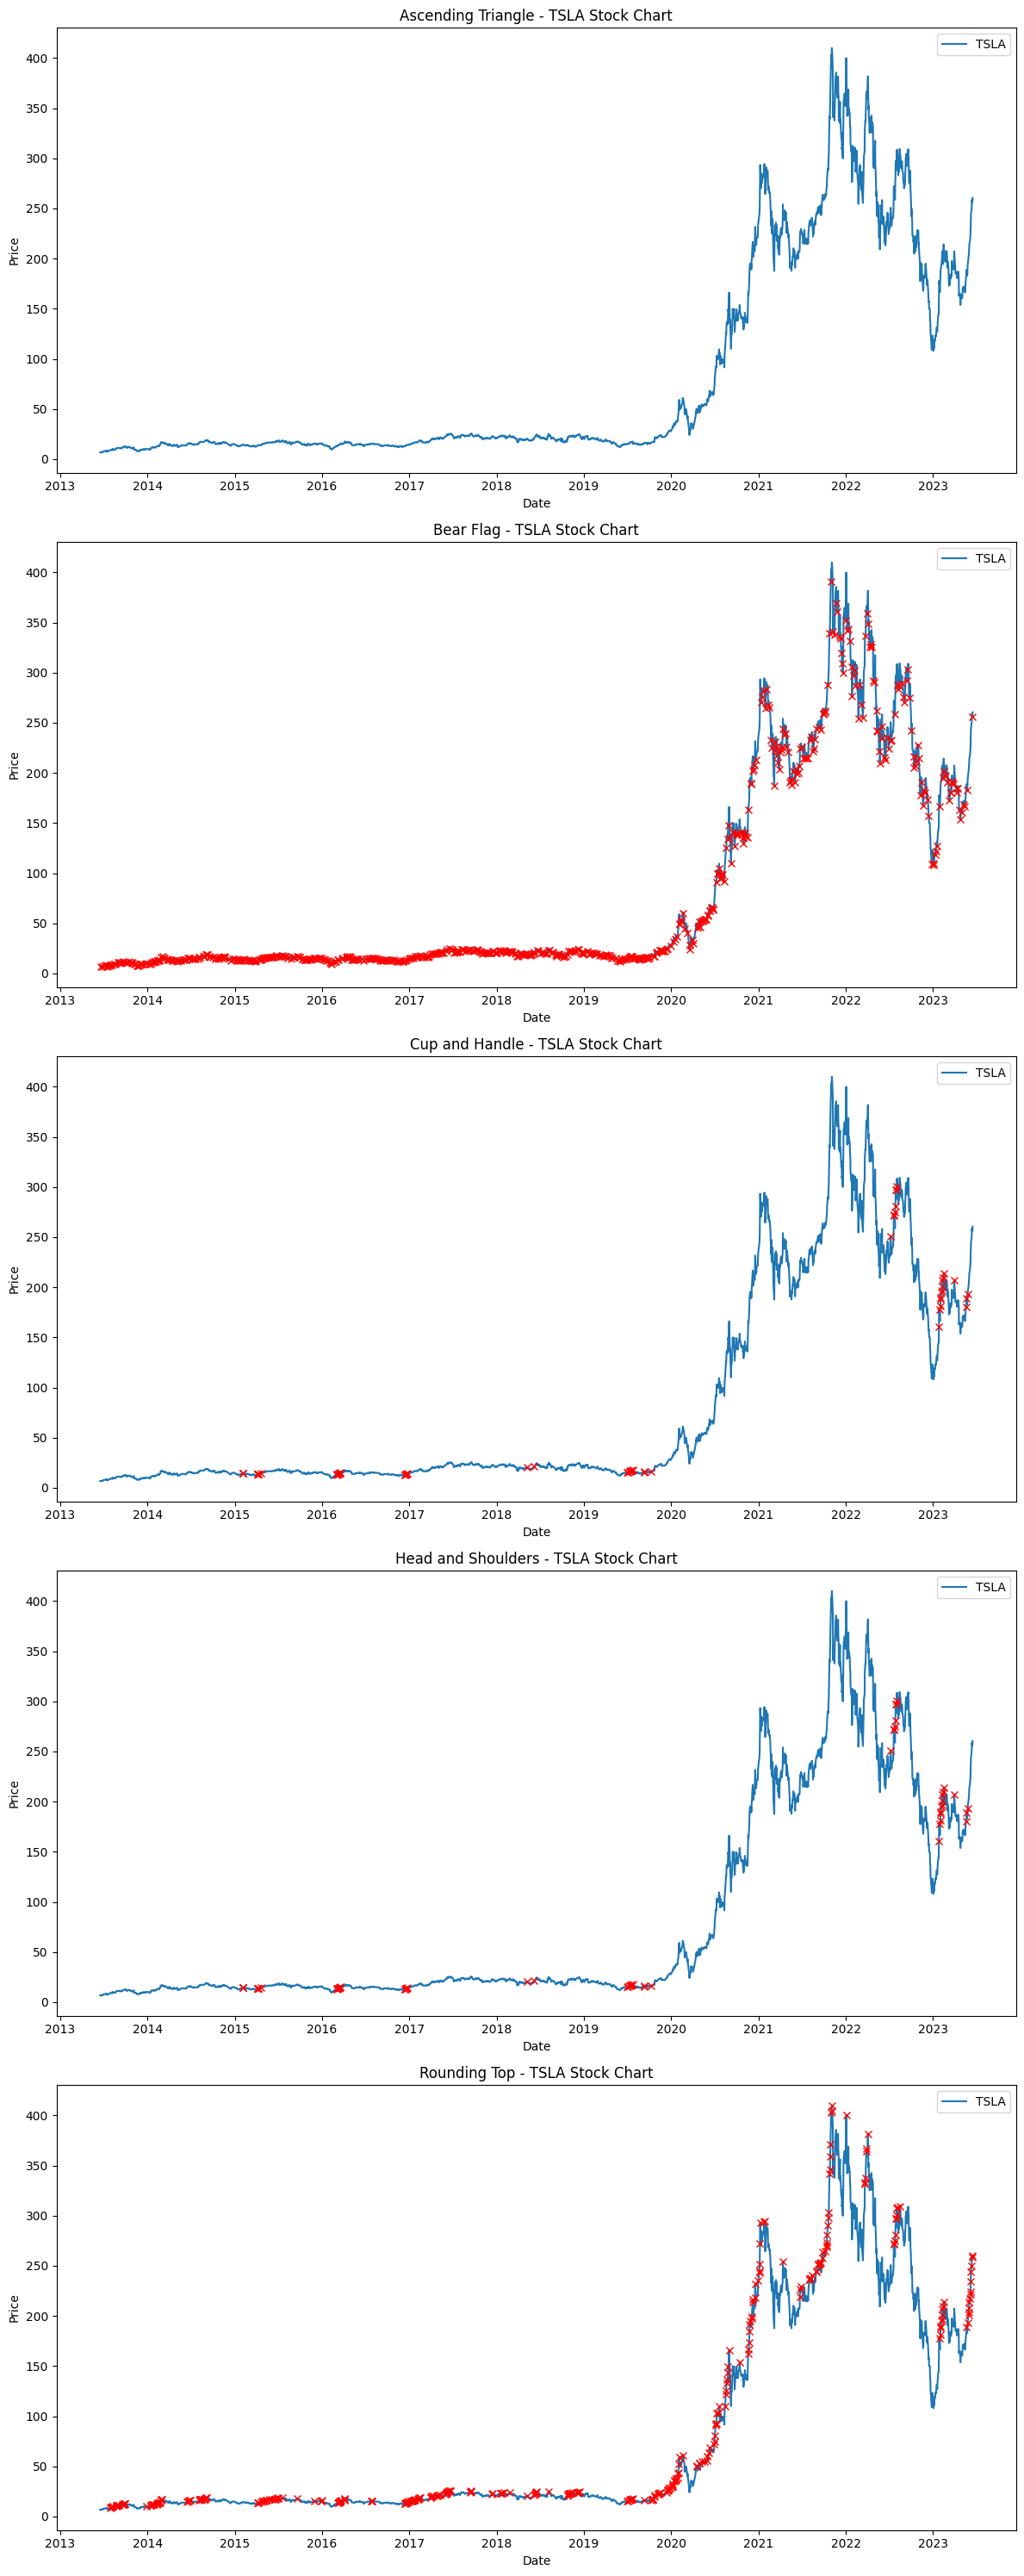

[*********************100%***********************]  1 of 1 completed


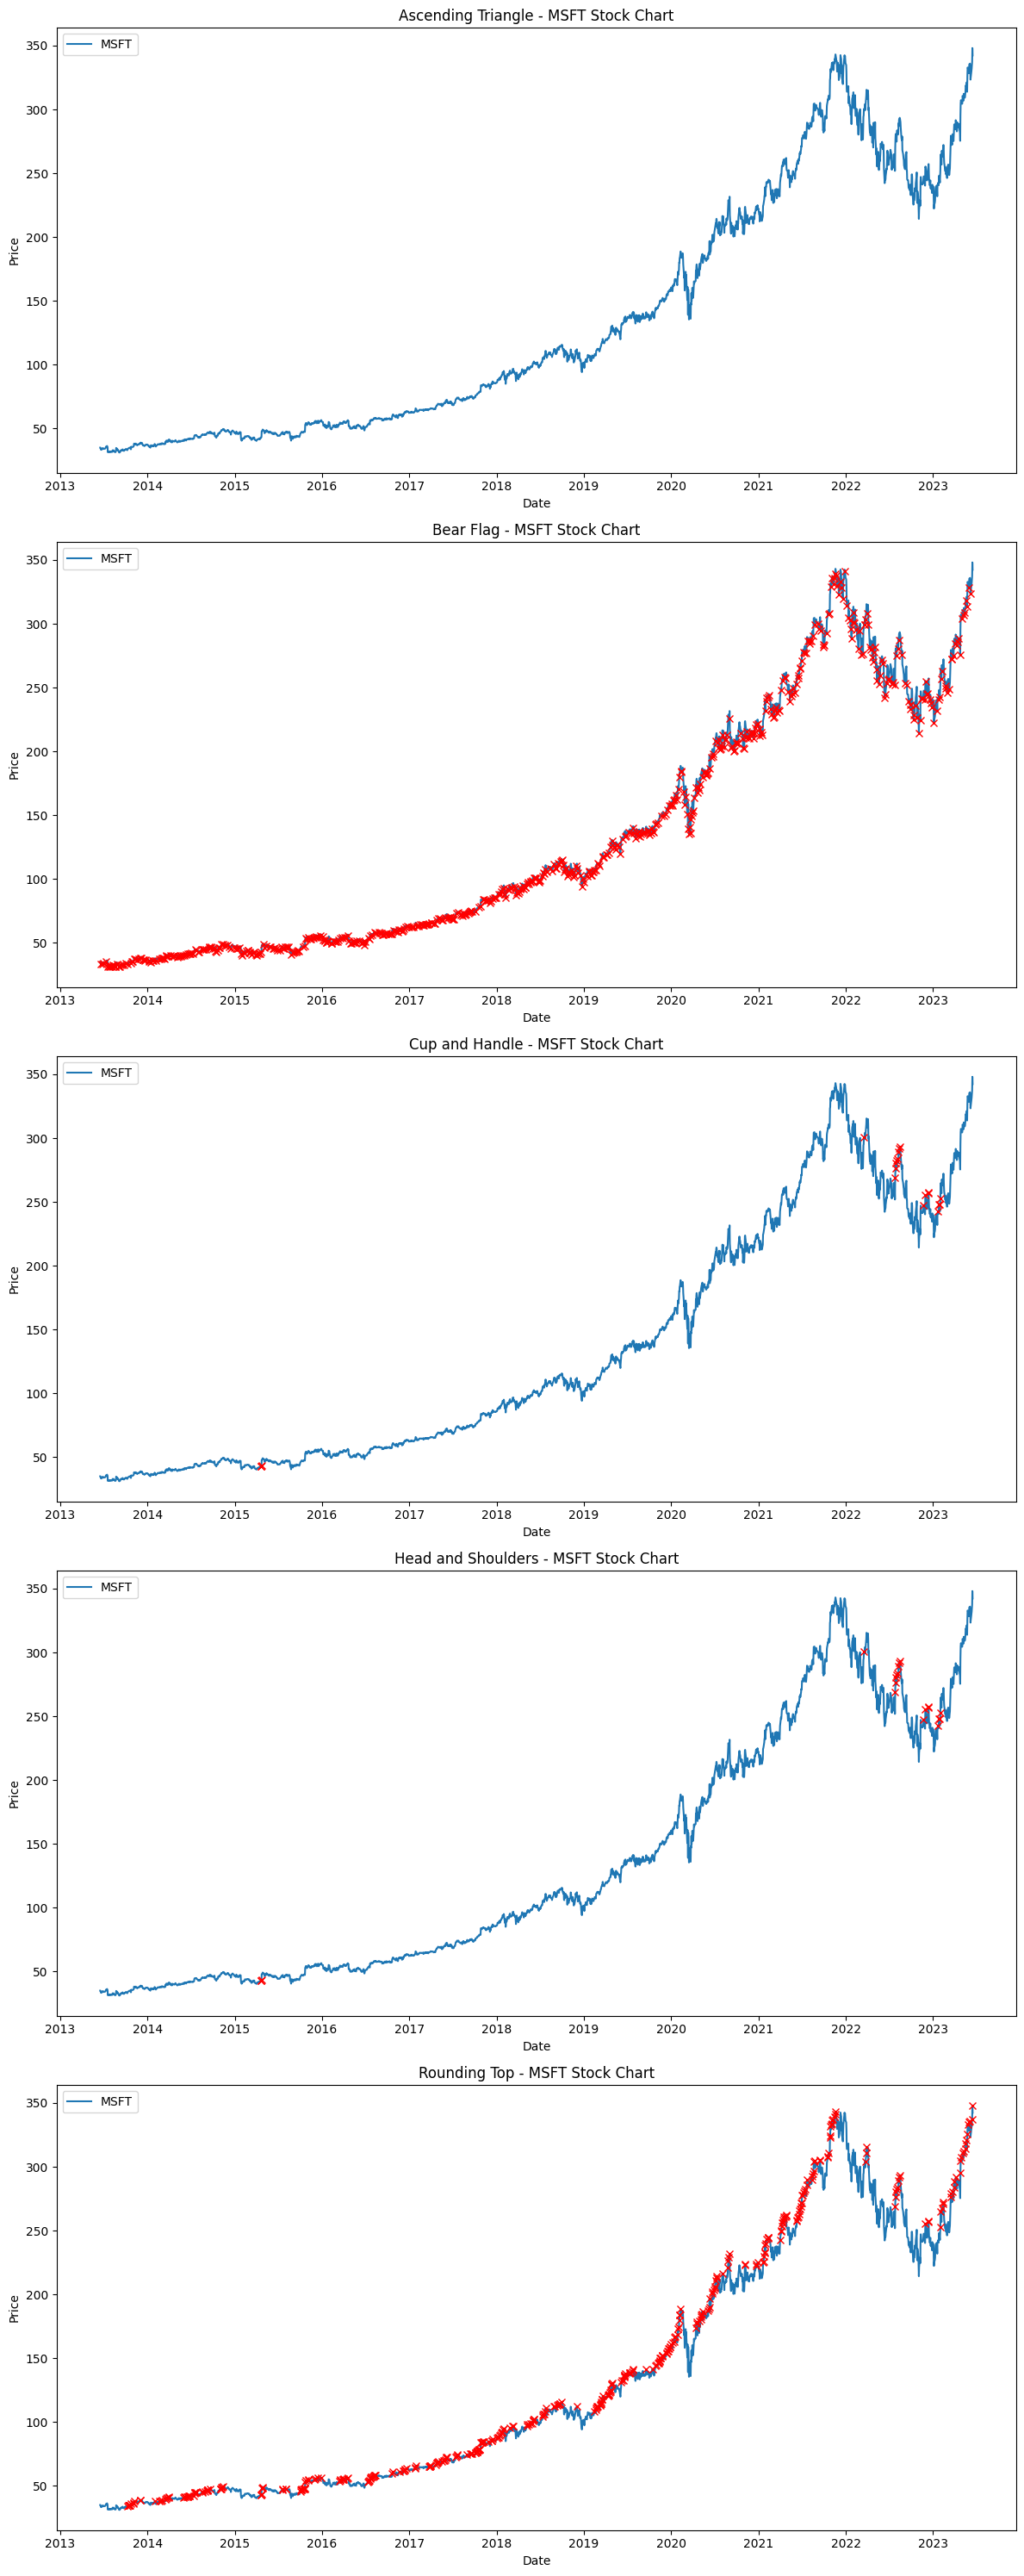

[*********************100%***********************]  1 of 1 completed


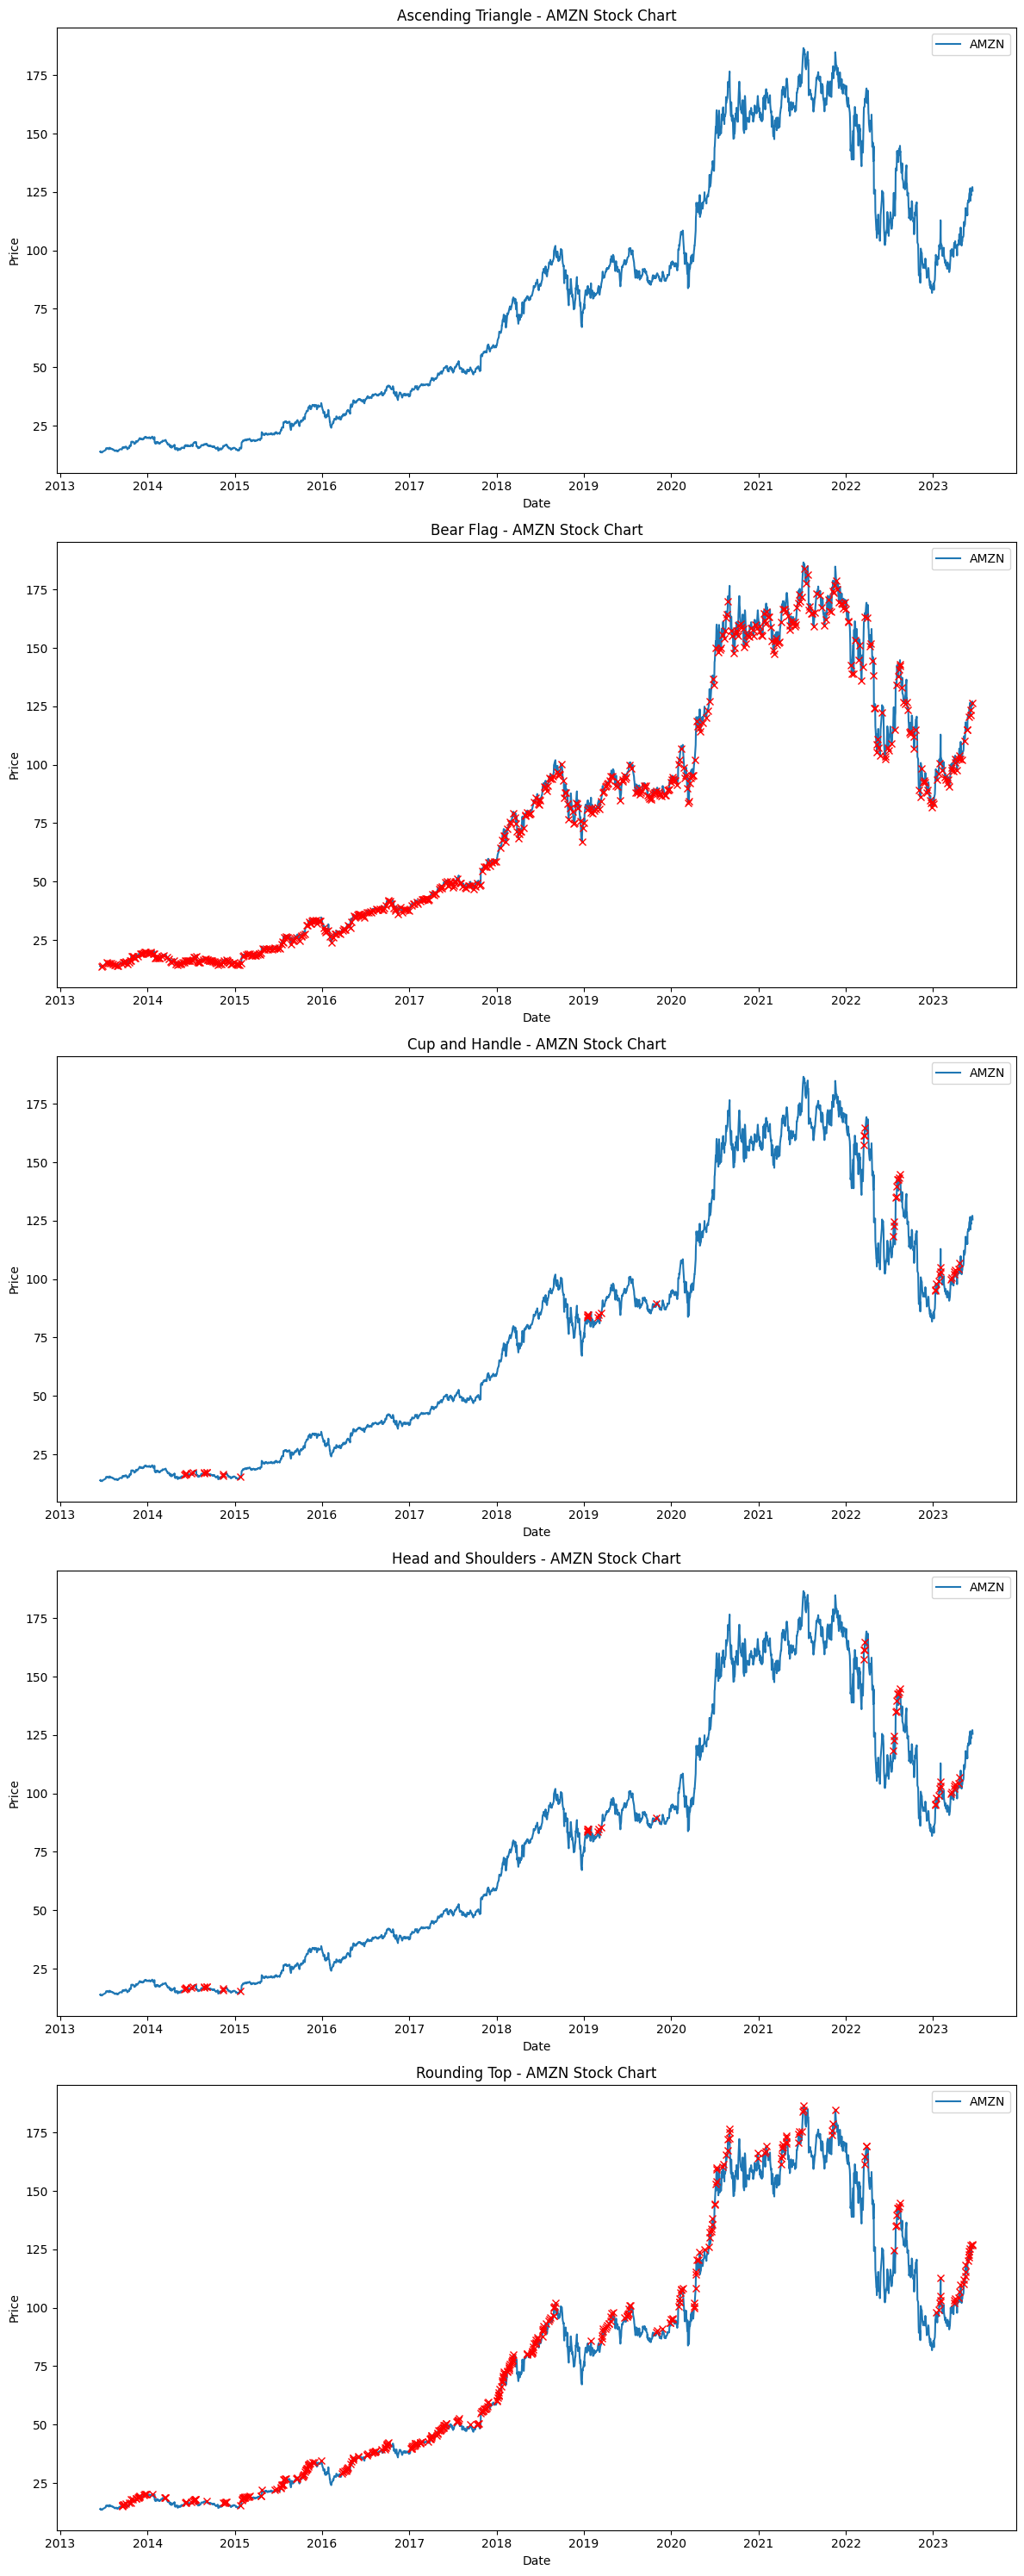

[*********************100%***********************]  1 of 1 completed


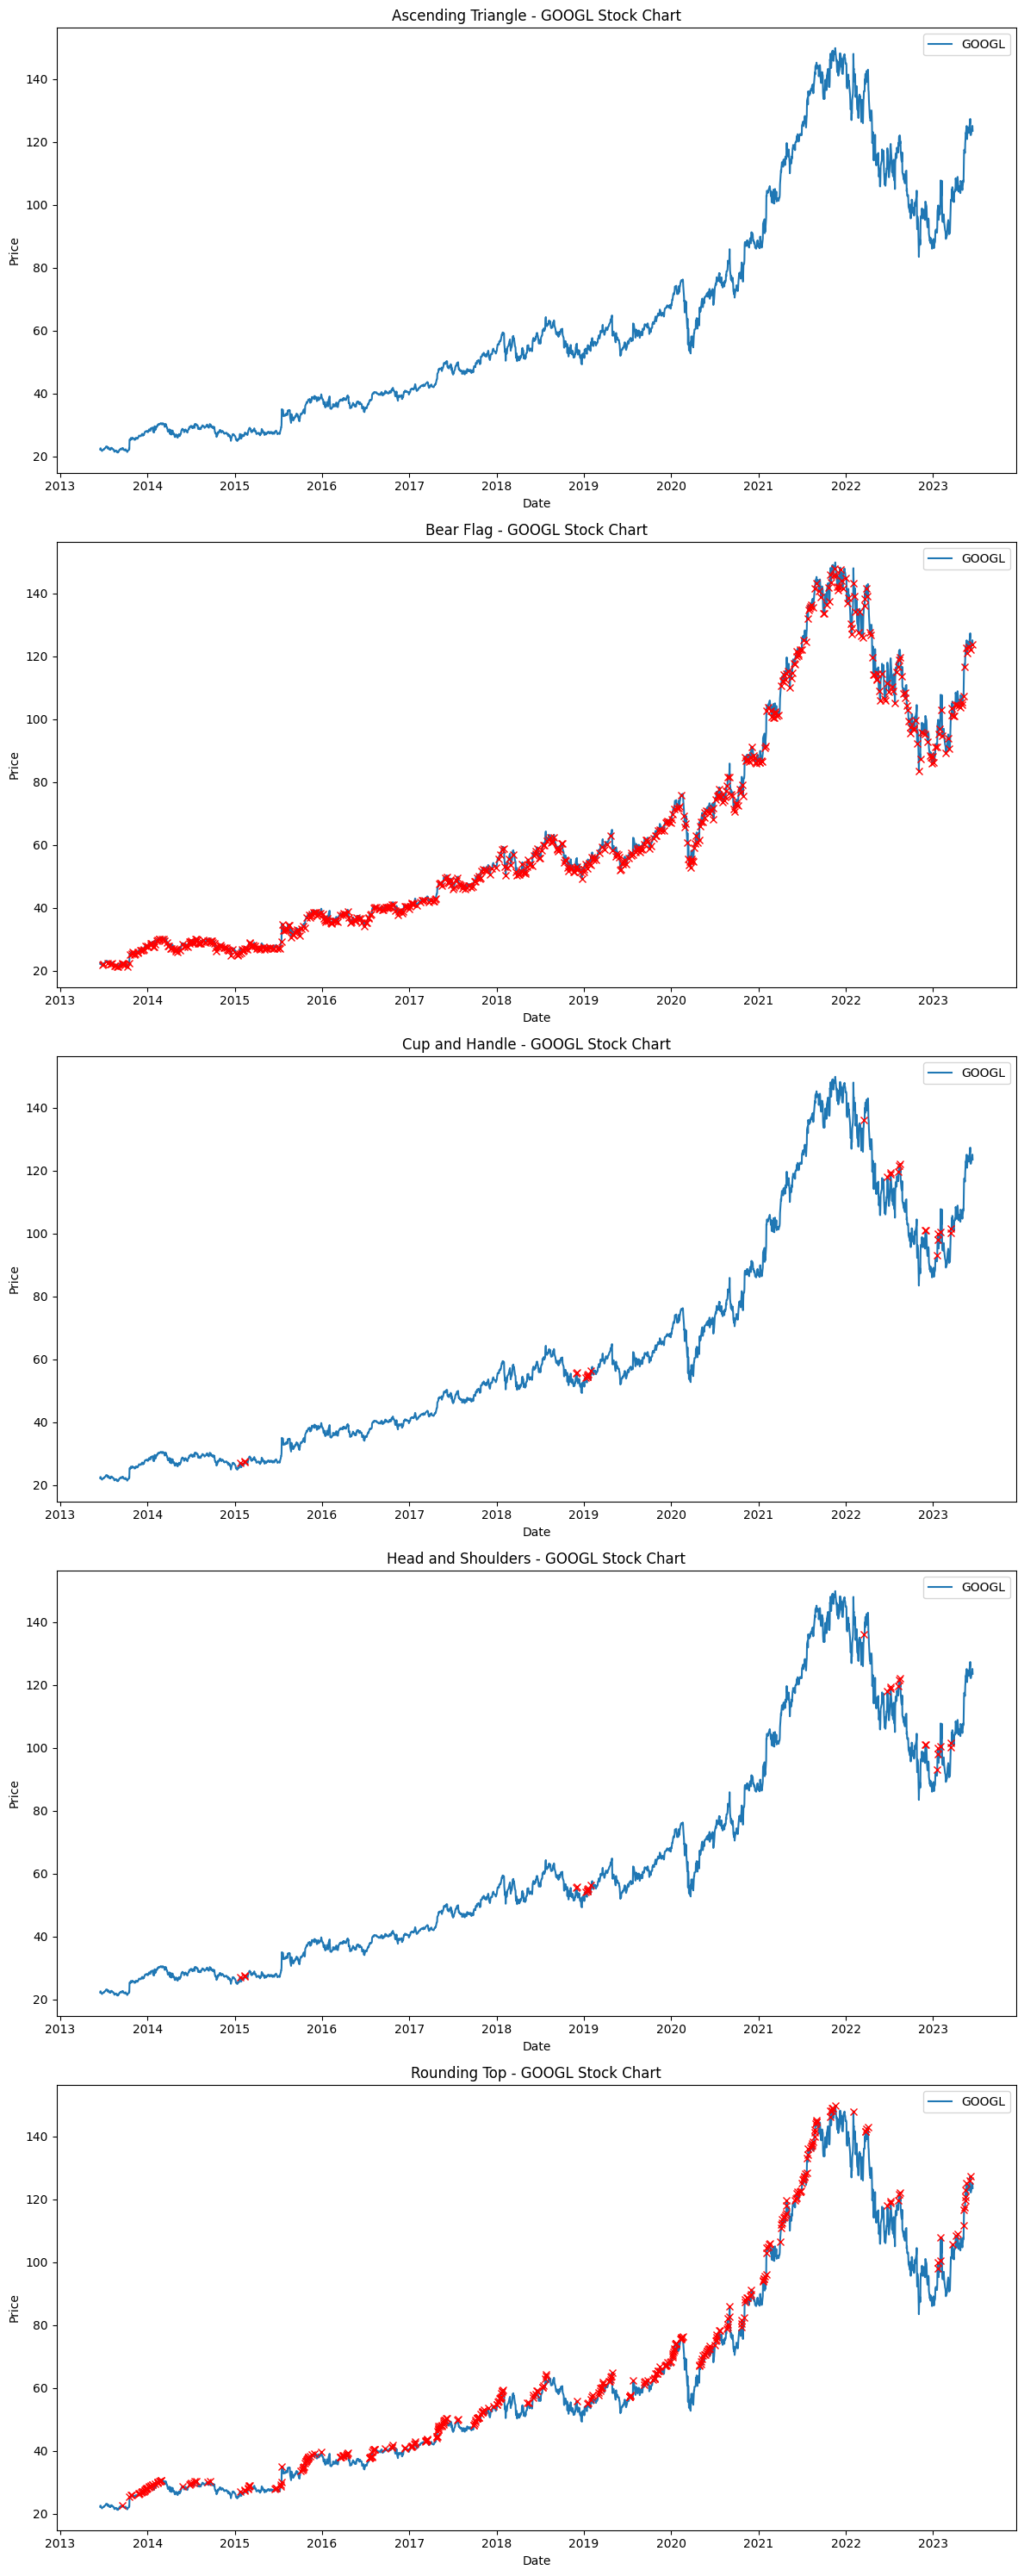

[*********************100%***********************]  1 of 1 completed


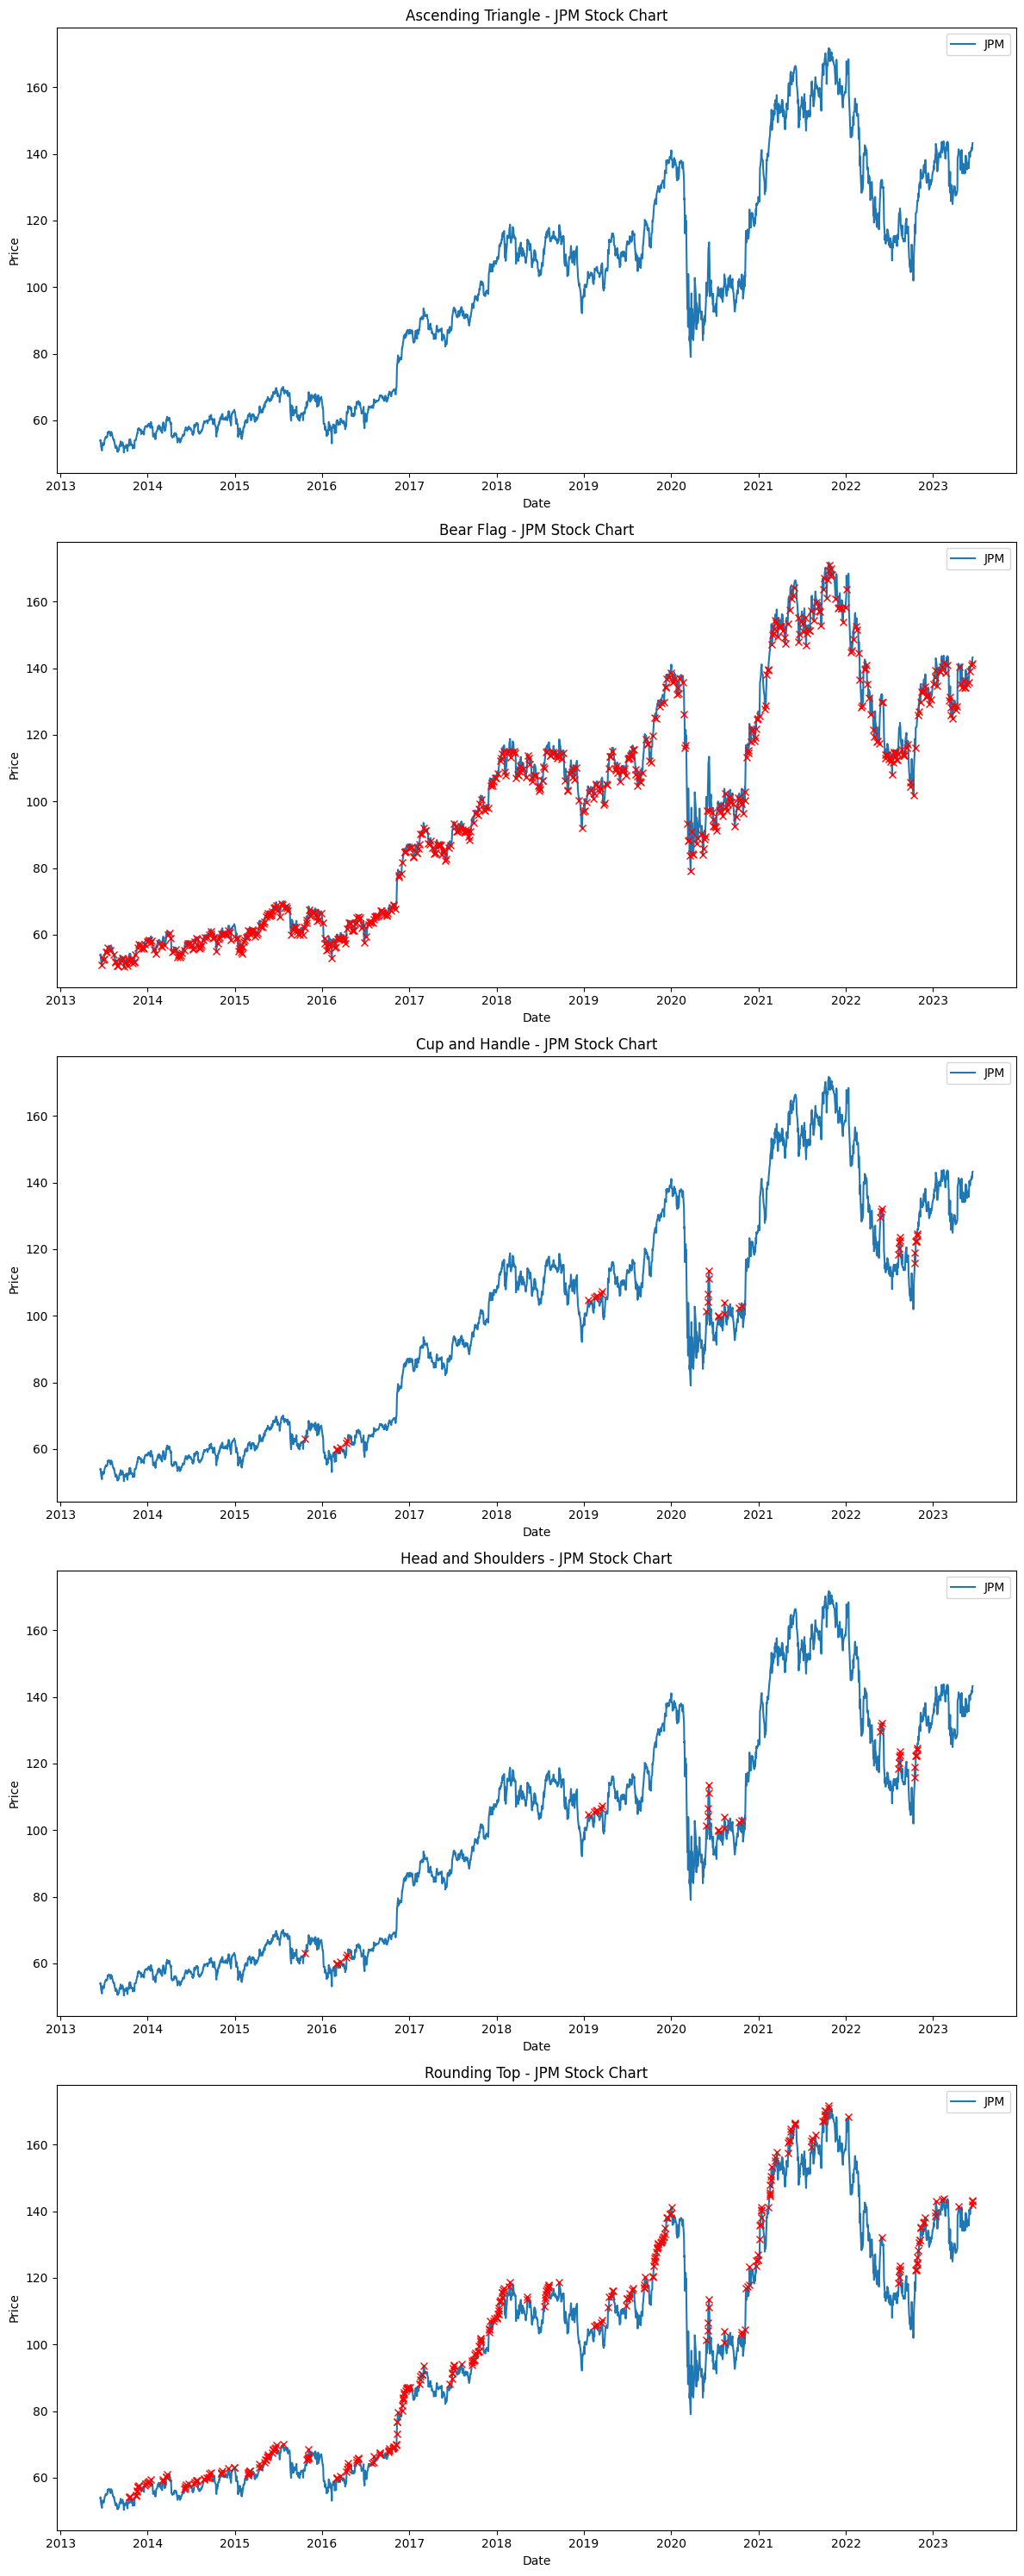

[*********************100%***********************]  1 of 1 completed


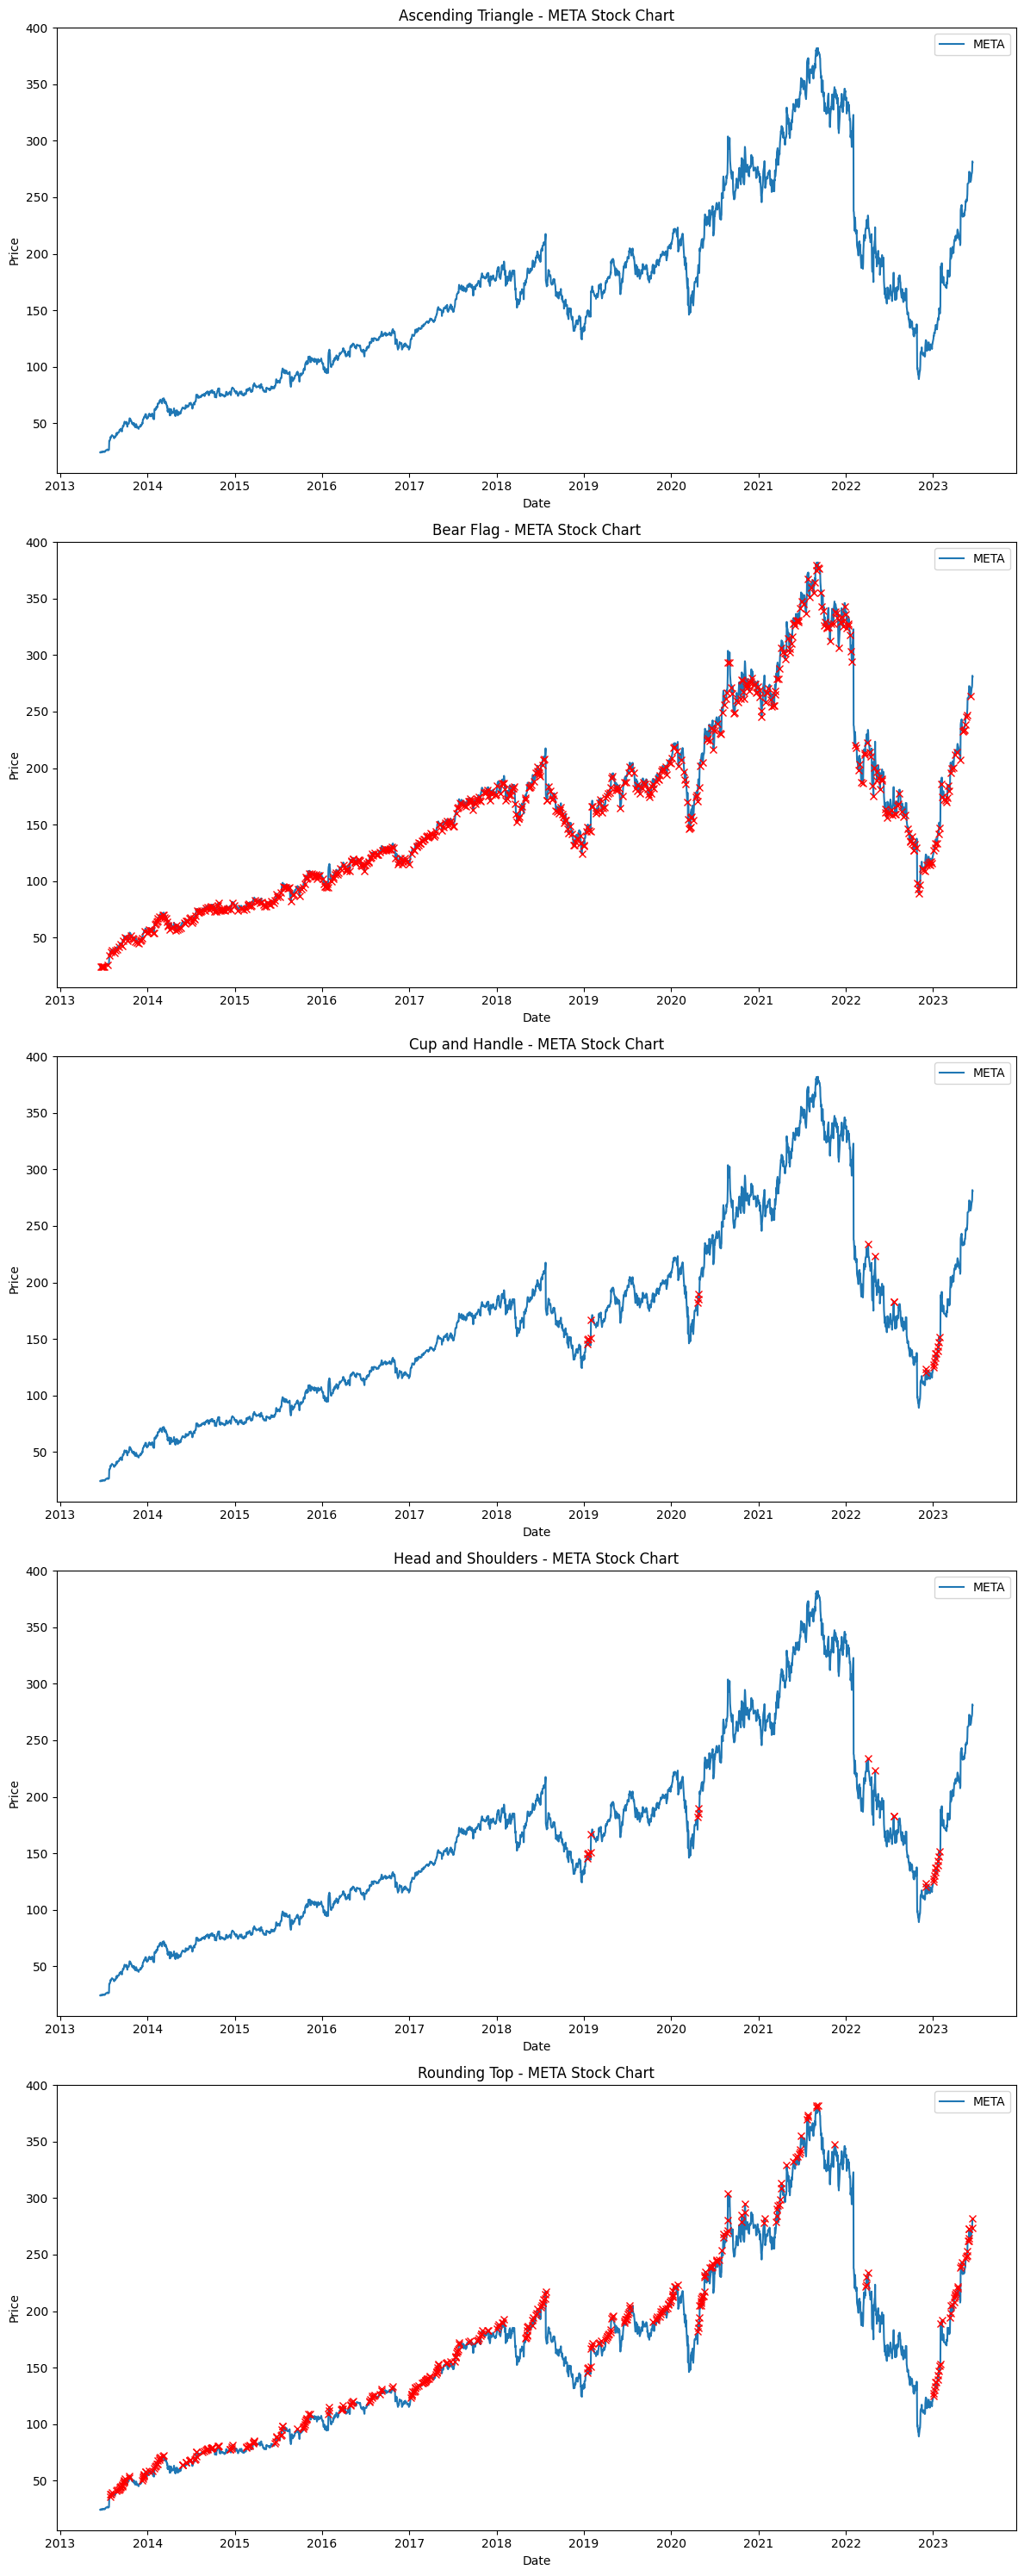

[*********************100%***********************]  1 of 1 completed


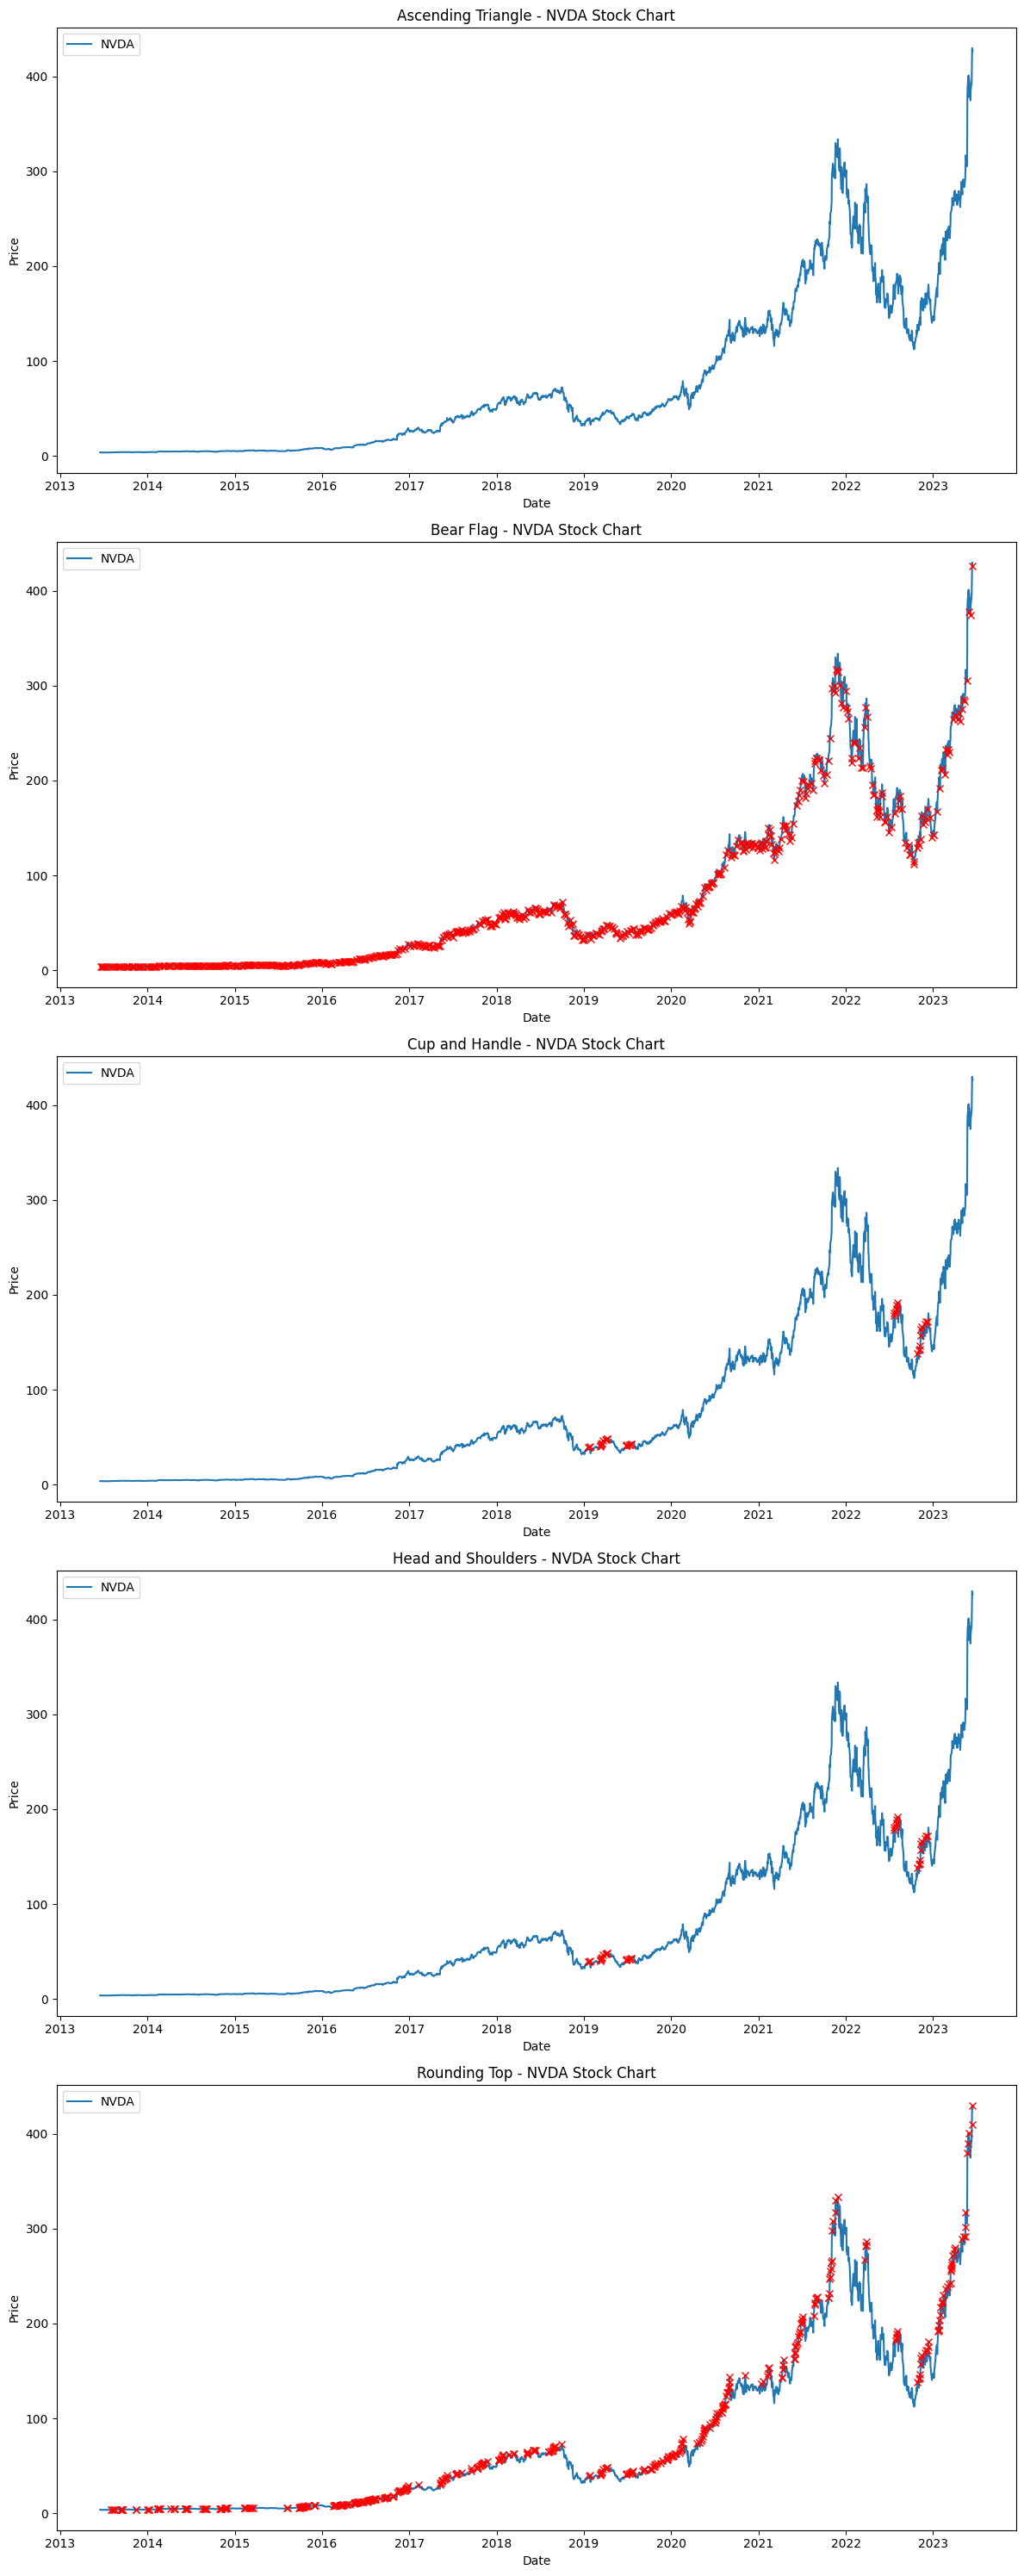

[*********************100%***********************]  1 of 1 completed


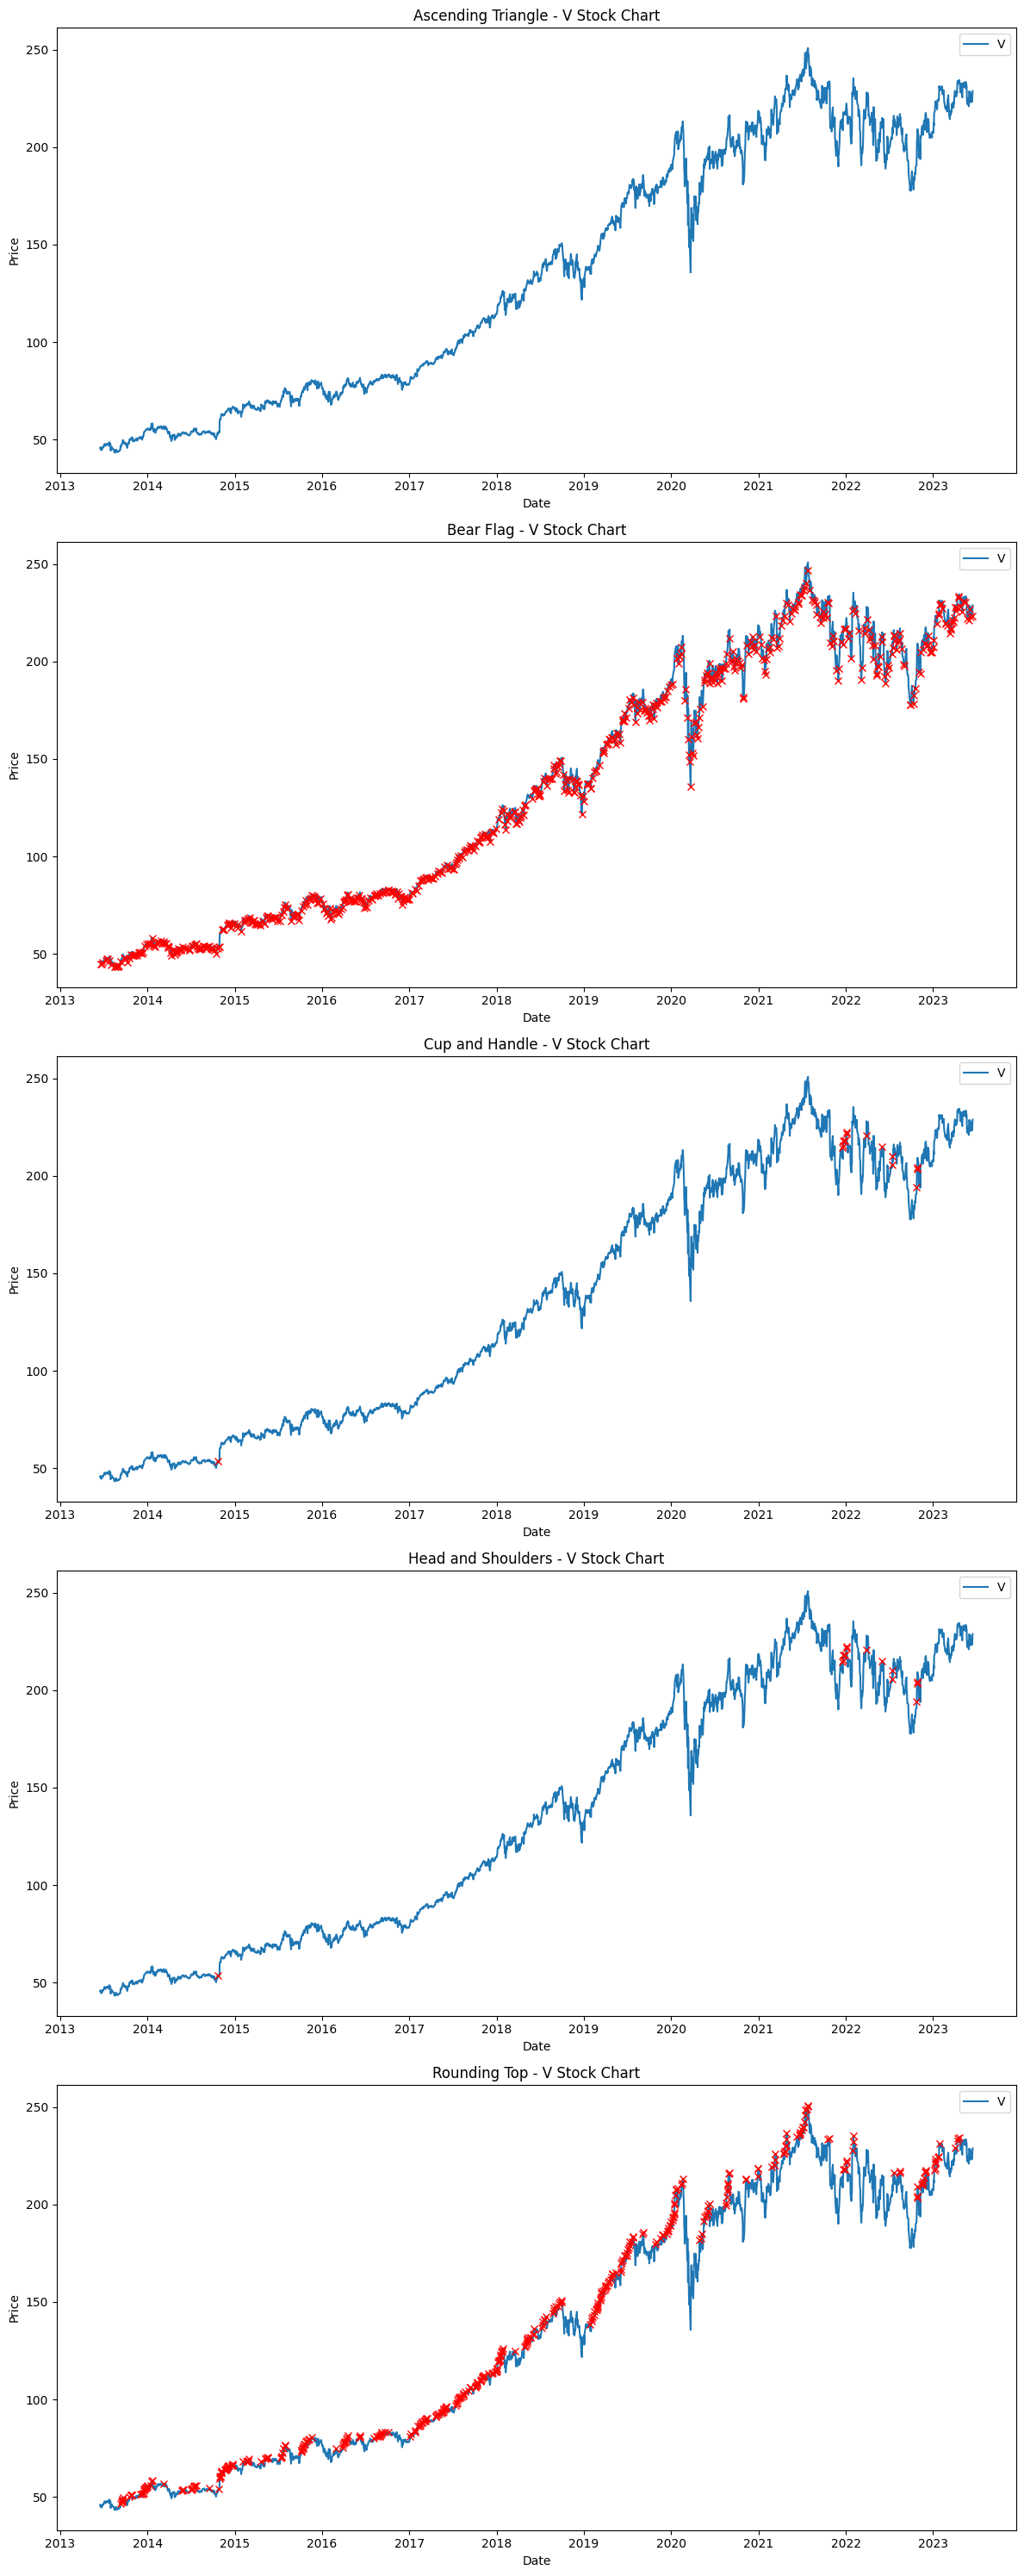

[*********************100%***********************]  1 of 1 completed


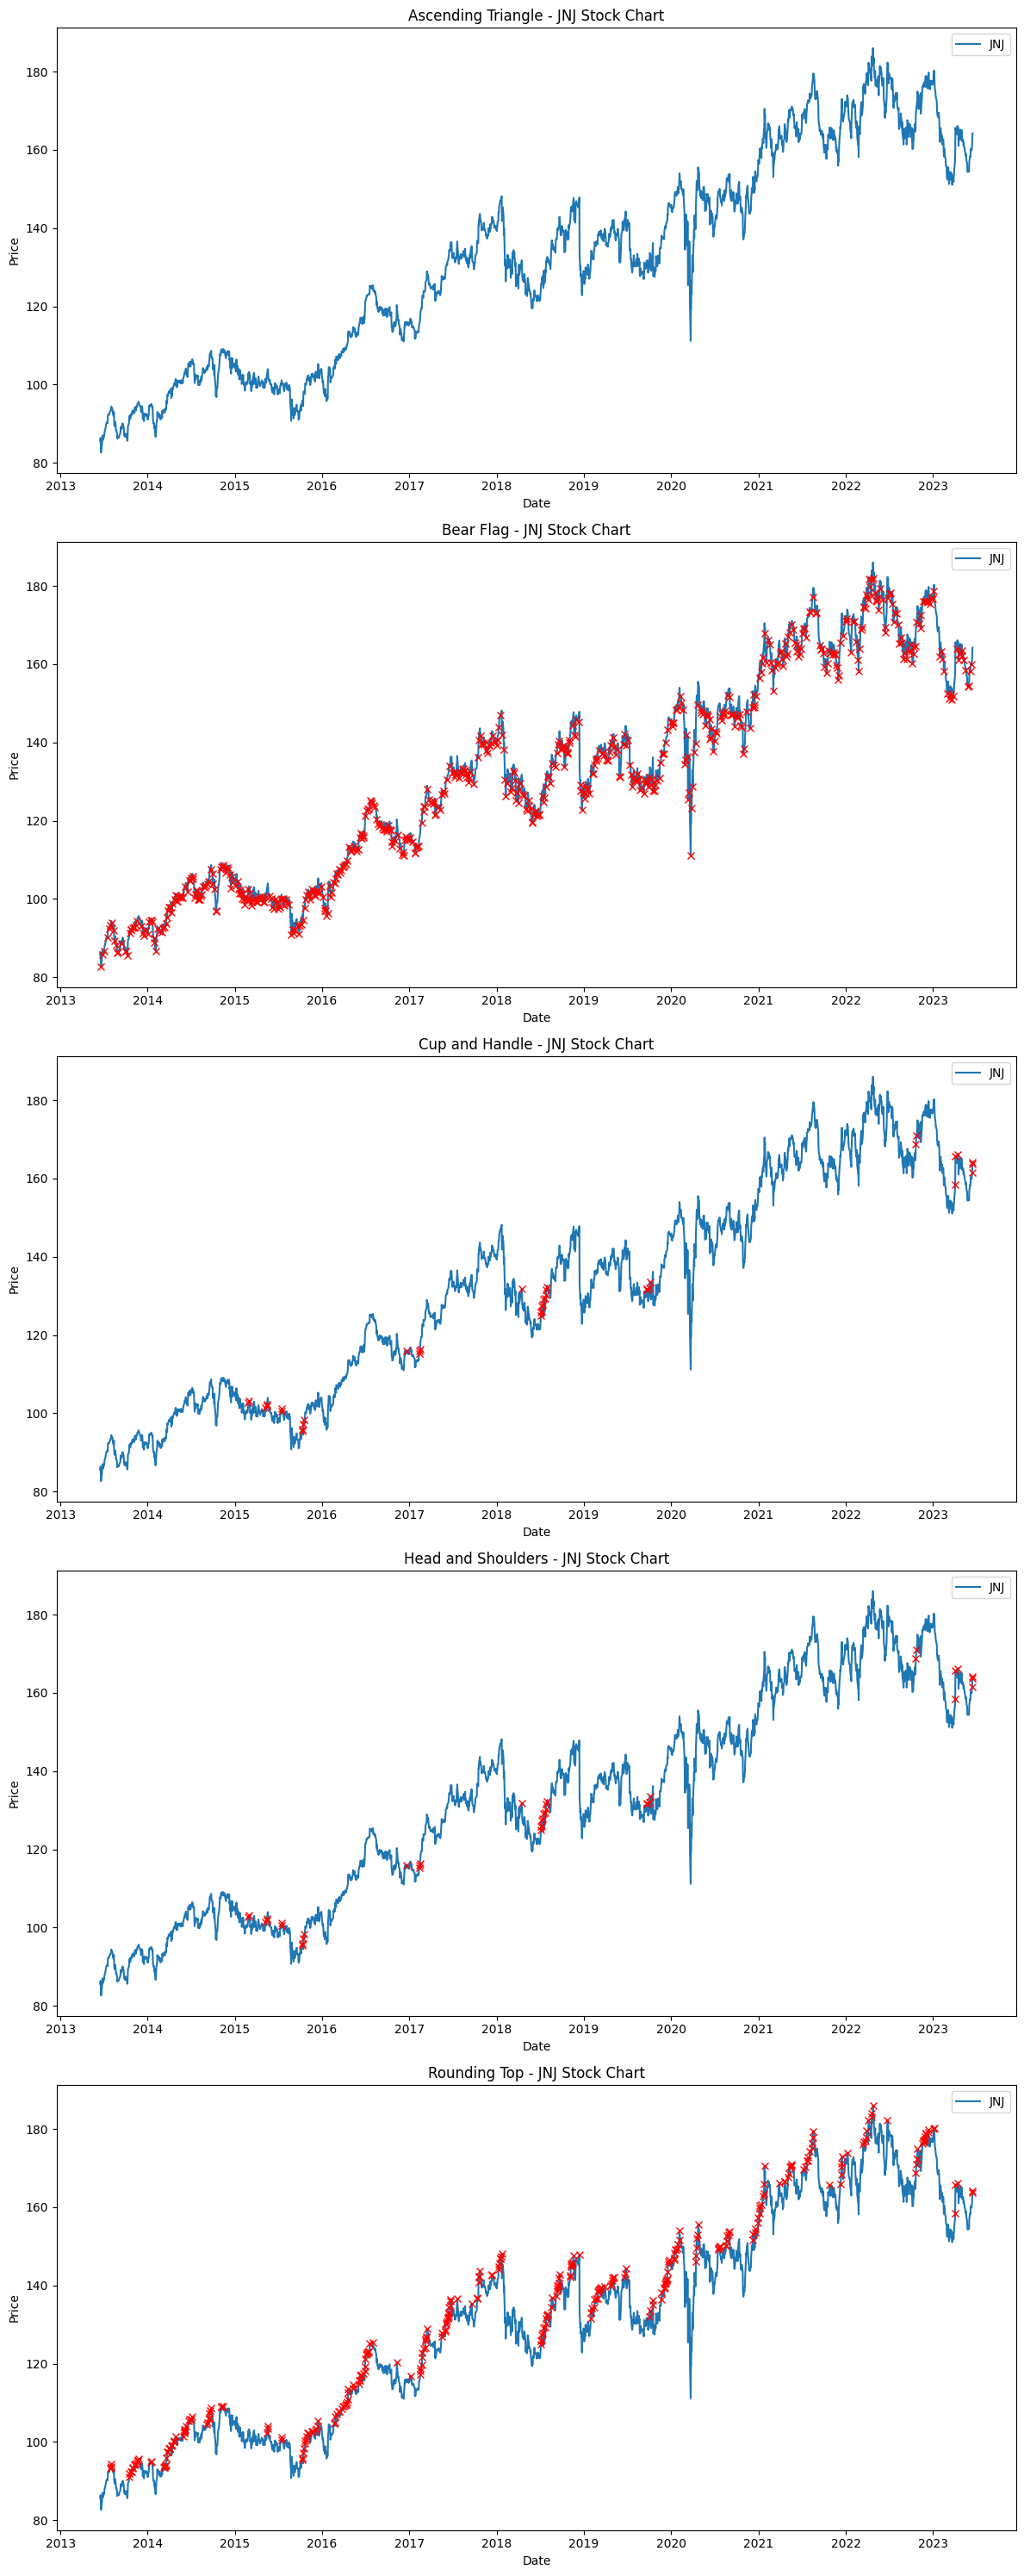

Chart patterns analysis completed for all stocks.


In [1]:
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np

# Define the list of stocks
stocks = [
    'AAPL', 'TSLA', 'MSFT', 'AMZN', 'GOOGL', 'JPM', 'META', 'NVDA', 'V', 'JNJ'
]

# Define the chart patterns
patterns = [
    'Ascending Triangle',
    'Bear Flag',
    'Cup and Handle',
    'Head and Shoulders',
    'Rounding Top'
]

# Loop through each stock
for stock in stocks:
    # Fetch historical data for the stock
    stock_data = yf.download(stock, start='2013-06-17', end='2023-06-17')

    # Create a subplot for each pattern
    fig, axes = plt.subplots(nrows=len(patterns), ncols=1, figsize=(12, 6*len(patterns)))

    # Loop through each pattern
    for i, pattern in enumerate(patterns):
        # Select the current subplot
        ax = axes[i]

        # Plot the stock chart
        ax.plot(stock_data['Close'], label=stock)
        ax.set_title(pattern + ' - ' + stock + ' Stock Chart')
        ax.set_xlabel('Date')
        ax.set_ylabel('Price')

        # Perform analysis and identify chart patterns
        if pattern == 'Ascending Triangle':
            # Identify ascending triangle pattern
            resistance_line = stock_data['High'].rolling(window=30).max()
            support_line = stock_data['Low'].rolling(window=30).min()
            ascending_triangle = (stock_data['Close'] > resistance_line) & (stock_data['Low'] > support_line)
            ax.plot(stock_data.loc[ascending_triangle, 'Close'], 'rx')

        elif pattern == 'Bear Flag':
            # Identify bear flag pattern
            flag = (stock_data['Close'] < stock_data['Close'].shift(1)) & (stock_data['Close'] < stock_data['Close'].shift(-1))
            ax.plot(stock_data.loc[flag, 'Close'], 'rx')

        elif pattern == 'Cup and Handle':
            # Identify cup and handle pattern
            ma50 = stock_data['Close'].rolling(window=50).mean()
            ma200 = stock_data['Close'].rolling(window=200).mean()
            cup = (stock_data['Close'] > ma50) & (stock_data['Close'] < ma200) & (stock_data['Close'] == stock_data['Close'].rolling(window=20).max())
            ax.plot(stock_data.loc[cup, 'Close'], 'rx')

        elif pattern == 'Head and Shoulders':
            # Identify head and shoulders pattern
            ma50 = stock_data['Close'].rolling(window=50).mean()
            ma200 = stock_data['Close'].rolling(window=200).mean()
            head_shoulders = (stock_data['Close'] > ma50) & (stock_data['Close'] < ma200) & (stock_data['Close'] == stock_data['Close'].rolling(window=20).max())
            ax.plot(stock_data.loc[head_shoulders, 'Close'], 'rx')

        elif pattern == 'Rounding Top':
            # Identify rounding top pattern
            rounding_top = stock_data['Close'] == stock_data['Close'].rolling(window=30).max()
            ax.plot(stock_data.loc[rounding_top, 'Close'], 'rx')

        ax.legend()

    # Display the plot
    plt.tight_layout()
    plt.show()

print("Chart patterns analysis completed for all stocks.")
